<a href="https://colab.research.google.com/github/sathvik-spartan/sathvik-spartan/blob/main/TEAM_11_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np   #Linear algera Library
import pandas as pd
import matplotlib.pyplot as plt  #to plot graphs
import seaborn as sns  #to plot graphs
from sklearn.linear_model import LinearRegression   #for linear regression model
sns.set()  #setting seaborn as default
import math

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("NSE-TATAGLOBAL.csv")   #reads the input data
data.head()   #displays the first five rows

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
data.describe(include ='all')

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
unique,2035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,NaN,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,NaN,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,NaN,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,NaN,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,NaN,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000


In [ ]:
data.isnull().sum() # No null values

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


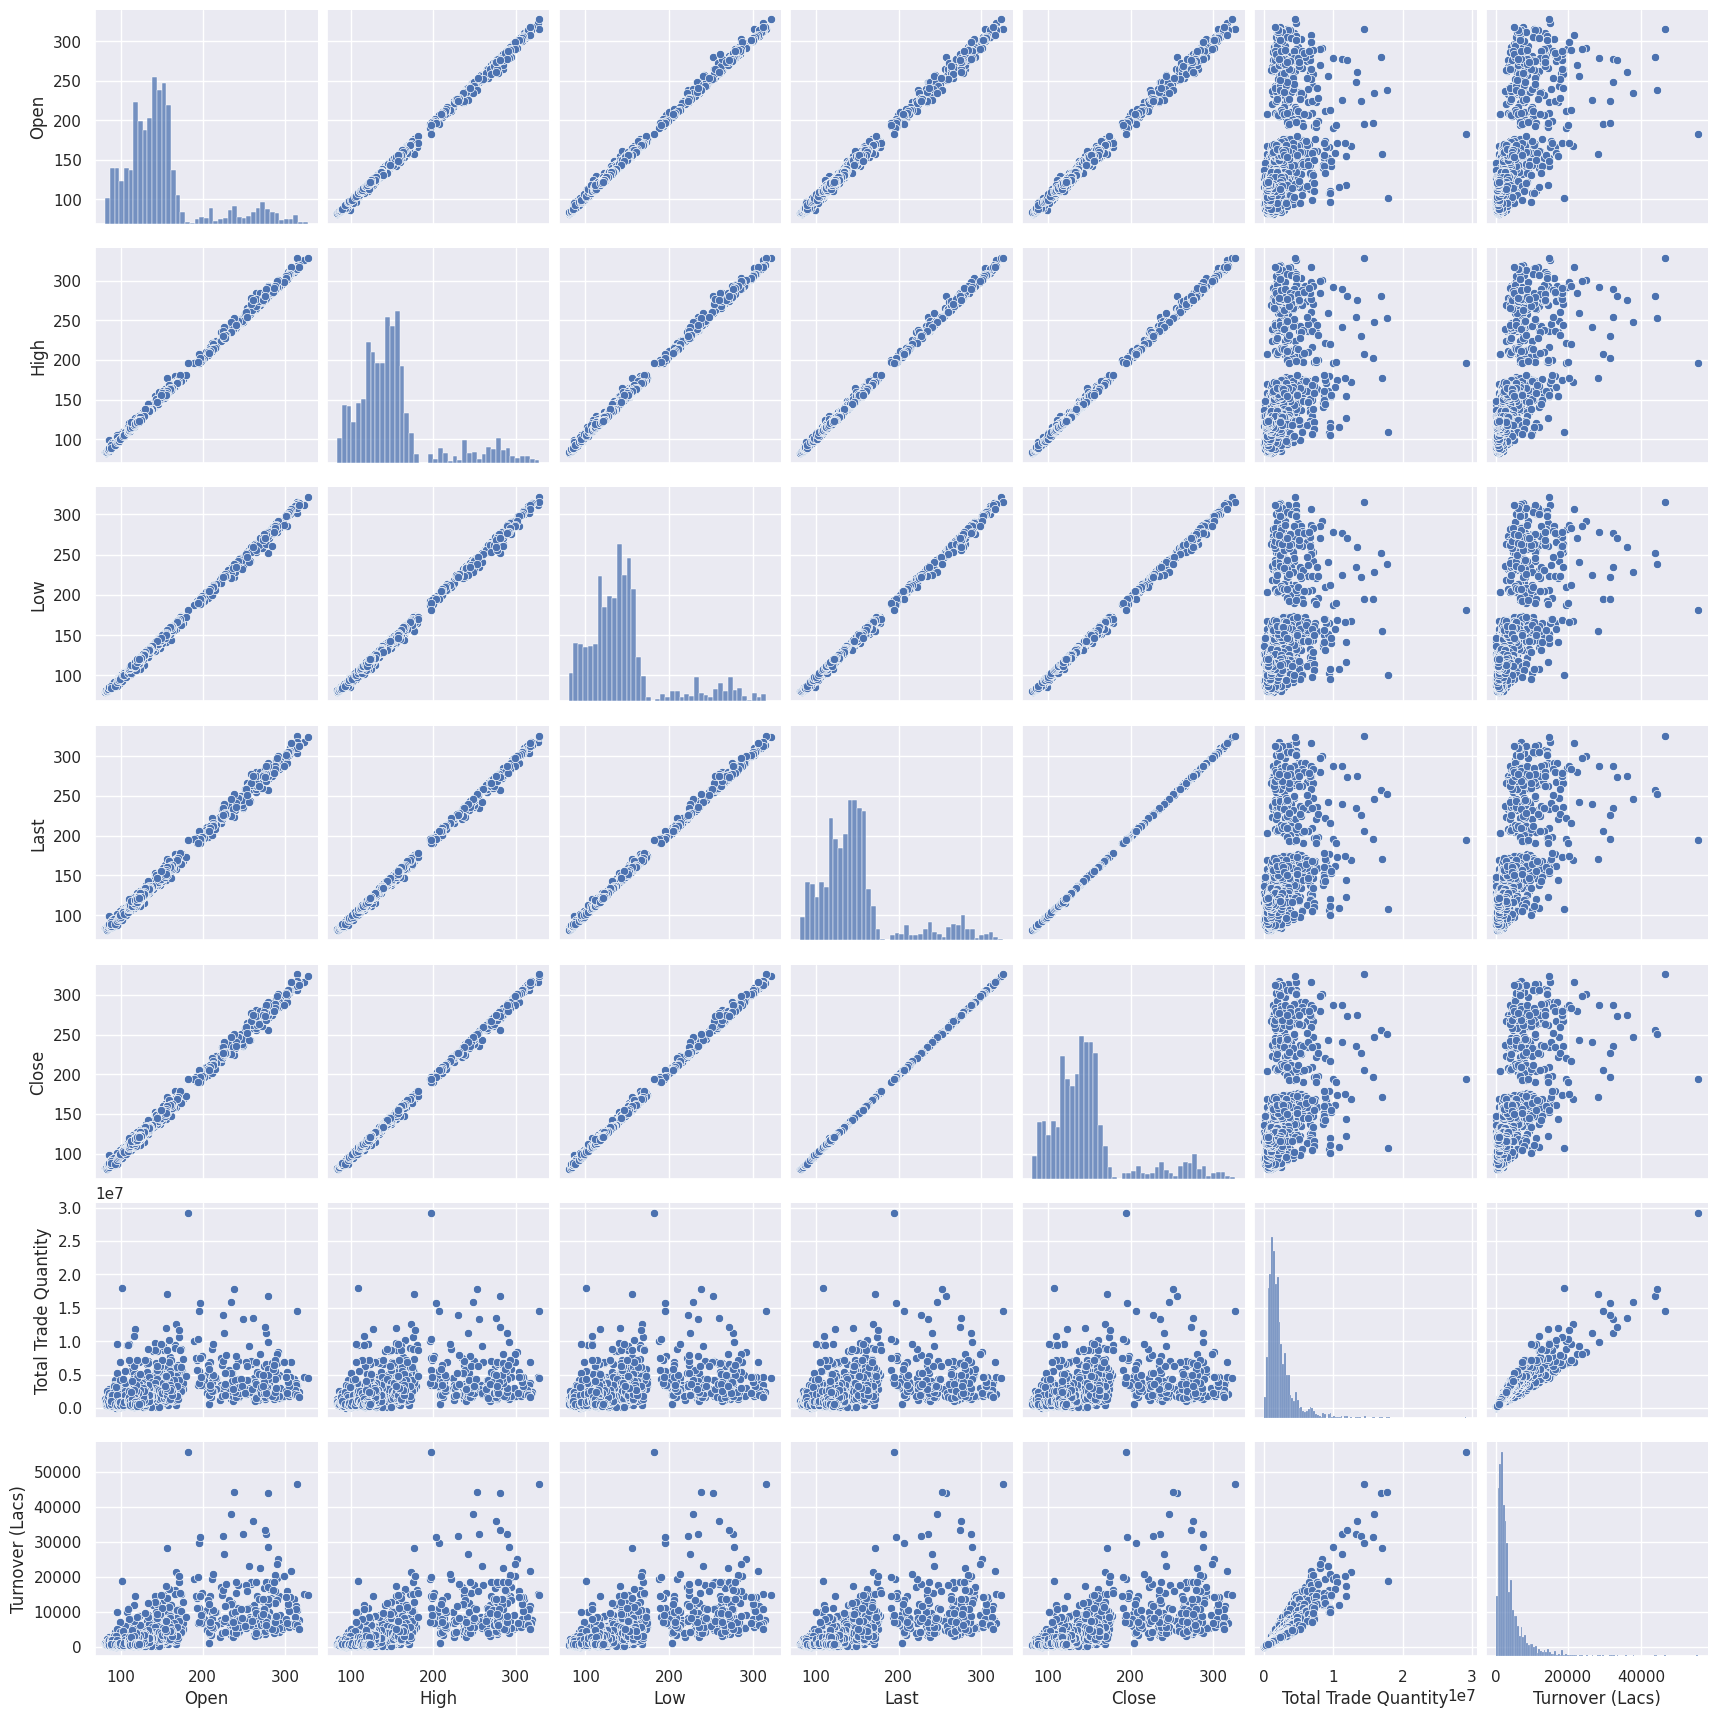

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
#  we use open,high,low,last to predict  close price
x=data[['High','Low','Last','Open','Total Trade Quantity','Turnover (Lacs)']].values   #input
y=data[['Close']].values

In [ ]:
from sklearn.model_selection import train_test_split
#split to train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [ ]:
lm=LinearRegression()
lm.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [ ]:
lm.coef_

array([[ 1.01169848e-01,  1.03111894e-01,  8.68908948e-01,
        -7.28108685e-02,  1.65156538e-08, -1.83864295e-05]])

In [ ]:
lm.score(x_train,y_train)

0.9999324083046829

In [ ]:
predictions = lm.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.9999374878212522

In [ ]:
dframe=pd.DataFrame({'actual':y_test.flatten(),'Predicted':predictions.flatten()})

In [ ]:
dframe.head(15)

,actual,Predicted
0,134.95,135.911017
1,145.35,145.826725
2,157.10,157.268006
3,152.15,152.025461
4,112.05,112.130204
5,156.95,157.553028
6,144.25,144.524053
7,163.60,163.628087
8,109.45,109.378091
9,141.00,140.933499


Text(0, 0.5, 'Closing price')

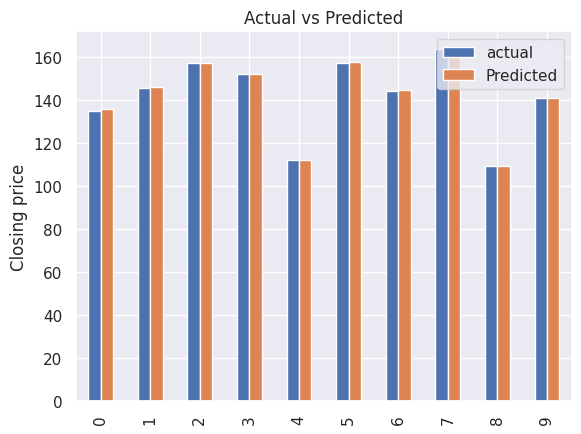

In [ ]:
graph =dframe.head(10)
graph.plot(kind='bar')
plt.title('Actual vs Predicted')
plt.ylabel('Closing price')

Text(0, 0.5, 'Predicted')

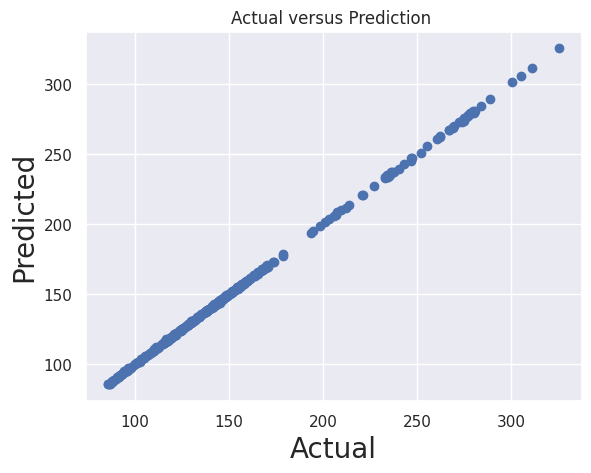

In [ ]:
#using scatter plot compare the actual and predicted data
fig = plt.figure()
plt.scatter(y_test,predictions)
plt.title('Actual versus Prediction ')
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Predicted', fontsize=20)

In [ ]:
import math
from sklearn import metrics

In [ ]:
#metrics to find accuracy of continous variables
print('Mean Abs value:' ,metrics.mean_absolute_error(y_test,predictions))
print('Mean squared value:',metrics.mean_squared_error(y_test,predictions))
print('root mean squared error value:',math.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Abs value: 0.2773168169894746
Mean squared value: 0.15226644841085718
root mean squared error value: 0.390213337048924


In [ ]:
from sklearn.metrics import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')
A = [[1, 2], [3, 4], [5, 6]]
B = [[7, 8], [9, 10]]
dist.pairwise(A,B)

array([[ 8.48528137, 11.3137085 ],
       [ 5.65685425,  8.48528137],
       [ 2.82842712,  5.65685425]])

In [ ]:
accuracy = lm.score(x_test, y_test) * 100
print("Accuracy percentage:", accuracy)

Accuracy percentage: 99.99374878212522
